In [1]:
#Run this notebook in the root directory of the project
%cd ../../

/data/main/2024/GridCellsCond


In [2]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.pyplot import cm
import seaborn as sns
import sim_utils as s_utils
import analysis_utils as a_utils


# 1D Activity Pattern

In [3]:
sim_id = 'BaseModel'
params=s_utils.load_sim_params(sim_id)
stell_spikes_l,intrnrn_spikes_l=s_utils.load_spikes(sim_id=sim_id)

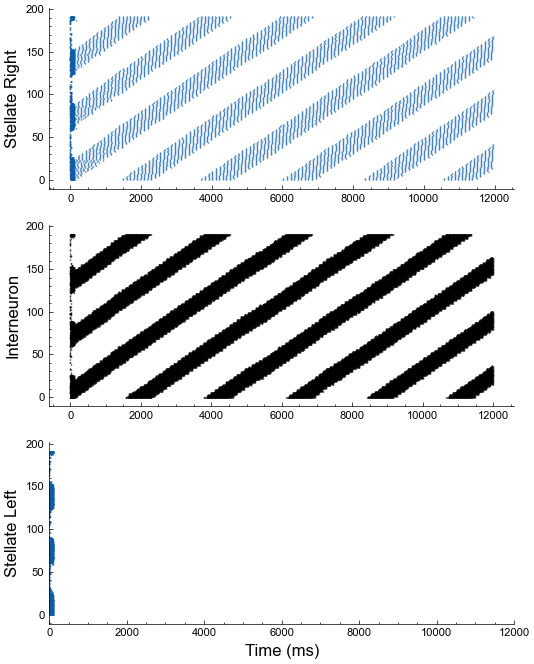

In [4]:
n_intrnrn=params['N_intrnrn']
n_stell=params['N_stell']
colors_stell = ['C{}'.format(i) for i in range(n_intrnrn)]
colors_stell_1 =['#0C5DA5' for i in range(n_intrnrn)]
colors_intrnrn =['k' for i in range(n_intrnrn)]
colors_stell_2 =['#0C5DA5' for i in range(n_intrnrn)]
plt.style.use("analysis/config/paper.mplstyle")
plt.rcParams['axes.labelsize'] = 12
fig,axs = plt.subplots(3,1,figsize=(6,8))
axs[0].eventplot(stell_spikes_l[:n_stell//2],colors=colors_stell_1,linestyles='solid')
axs[0].set(ylabel='Stellate Right')
axs[1].set(ylabel='Interneuron')
axs[1].eventplot(intrnrn_spikes_l,colors=colors_intrnrn,linestyles='solid')
axs[2].eventplot(stell_spikes_l[n_stell//2:],colors=colors_stell_2,linestyles='solid')
axs[2].set(xlabel='Time (ms)',ylabel='Stellate Left')
plt.xlim(0,params["sim_dur"])
plt.show()

# 2D Activity Pattern

In [11]:
sim_id='BaseModel2D'
params = s_utils.load_sim_params(sim_id)
stell_spks_l,intrnrn_spks_l = s_utils.load_spikes(sim_id)

In [12]:
n_per_sheet=params["N_per_sheet"]
sheet_to_plot=0
idx = np.full((4,2),n_per_sheet)*np.array([[0,1],[1,2],[2,3],[3,4]])
stell_spks_reshaped = a_utils.spks_to_rate_reshaped(stell_spks_l[idx[sheet_to_plot][0]:idx[sheet_to_plot][1]],params,win_size=100)

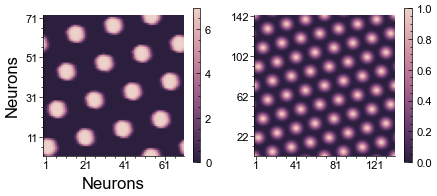

In [13]:
plt.style.use("analysis/config/paper.mplstyle")
plt.rcParams['axes.labelsize'] = 12
t_plot = 3000
auto_corr,grid_score,grid_scale,grid_size = a_utils.grid_props_2D(stell_spks_reshaped,t=t_plot)
fig,axs=plt.subplots(1,2,figsize=(5,2))
im0=axs[0].imshow(stell_spks_reshaped[:,:,t_plot],cmap=sns.cubehelix_palette(as_cmap=True,reverse=True))
cbar = axs[0].figure.colorbar(im0, ax=axs[0])
axs[0].set(xlabel="Neurons",ylabel="Neurons",xticks=np.arange(1,params["N_per_axis"],20),xticklabels=np.arange(1,params["N_per_axis"],20),yticks=np.arange(1,params["N_per_axis"],20),yticklabels=np.arange(params["N_per_axis"],-1,-20))
axs[0].tick_params(which="both",direction="out",pad=0.5)
im1=axs[1].imshow(auto_corr,cmap=sns.cubehelix_palette(as_cmap=True,reverse=True))
cbar = axs[1].figure.colorbar(im1, ax=axs[1])
axs[1].set(xticks=np.arange(1,params["N_per_axis"]*2,40),xticklabels=np.arange(1,params["N_per_axis"]*2,40),yticks=np.arange(1,params["N_per_axis"]*2,40),yticklabels=np.arange(params["N_per_axis"]*2,-1,-40))
axs[1].tick_params(which="both",direction="out",pad=0.5)
plt.show()